# Challenge: Preparing a Dataset for Modeling #

### Preparing Housing Dataset from Ames, IA for Modeling ###

### By Lorenz Madarang ###

### Data: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data ###

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_selection import SelectPercentile

In [2]:
housing_prices = pd.read_csv('House_Prices.csv')

### Initial Look at Data ###

In [3]:
housing_prices.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
housing_prices.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [5]:
housing_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### Separating Data into Predictor Variable Data and Response Variable Data ###

Sale Price is the Response Variable and I created a dataset of some of the continuous variables I believe would be good predictor variables.

In [8]:
housing_target = housing_prices['SalePrice']

In [36]:
housing_continuous = housing_prices[['LotArea', 'OverallQual','OverallCond','GrLivArea','GarageArea','TotRmsAbvGrd', 'GarageCars', 'Age', 'AllArea', 'Total_Bath']]

In [37]:
housing_continuous.head()

,LotArea,OverallQual,OverallCond,GrLivArea,GarageArea,TotRmsAbvGrd,GarageCars,Age,AllArea,Total_Bath
0,8450,7,5,1710,548,8,2,15,3114,4
1,9600,6,8,1262,460,6,2,42,2984,3
2,11250,7,5,1786,608,6,2,17,3314,4
3,9550,7,5,1717,642,7,3,103,3115,2
4,14260,8,5,2198,836,9,3,18,4179,4


### Feature Selection of Continuous Variables Using SelectPercentile ###

Intially, I had 10 continuous variables that would be considered as the best predictor variables, but by applying SelectPercentile from SciKit Learn I reduced it to the variables in the top third.  The variables that were in the top third were OverallQual, GrLivArea, and AllArea.  I will use OverallQual, GrLivArea, and AllArea as the continuous predictor variables to use in my modeling. 

In [38]:
select = SelectPercentile(percentile=33)
select.fit(housing_continuous, housing_target)
x_continuous_selected = select.transform(housing_continuous)

print('housing_continuous is: {}'.format(housing_continuous.shape))
print('x_continuous_selected is: {}'.format(x_continuous_selected.shape))

housing_continuous is: (1460, 10)
x_continuous_selected is: (1460, 3)


In [39]:
x_continuous_selected

array([[   7, 1710, 3114],
       [   6, 1262, 2984],
       [   7, 1786, 3314],
       ..., 
       [   7, 2340, 3744],
       [   5, 1078, 2396],
       [   5, 1256, 2788]])

#### Pearson Score of Overall Quality Score with Sale Price ####

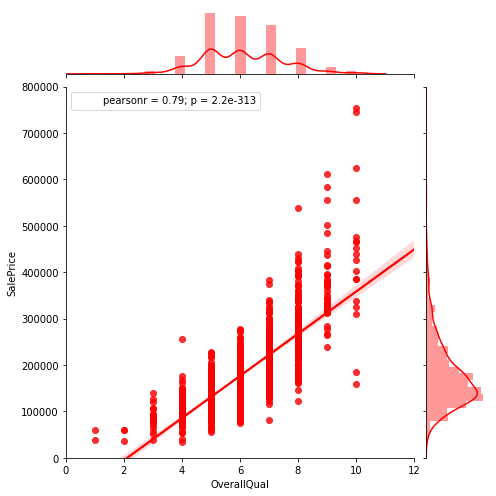

In [12]:
g = sns.jointplot("OverallQual", "SalePrice", data=housing_prices, kind="reg",
                  xlim=(0, 12), ylim=(0, 800000), color="r", size=7)

#### Pearson Score of Living Area Above Ground with Sale Price ####

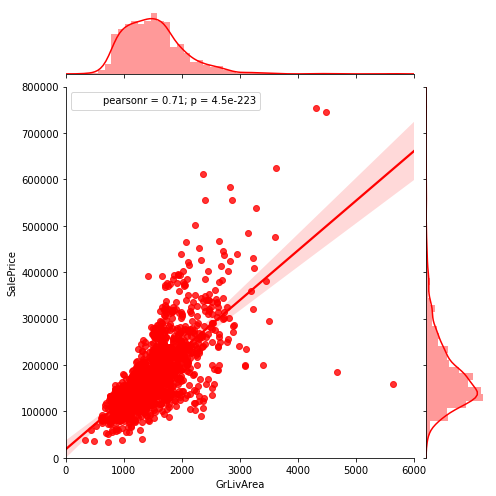

In [13]:
g = sns.jointplot("GrLivArea", "SalePrice", data=housing_prices, kind="reg",
                  xlim=(0, 6000), ylim=(0, 800000), color="r", size=7)

#### Pearson Score of All Area with Sale Price ####

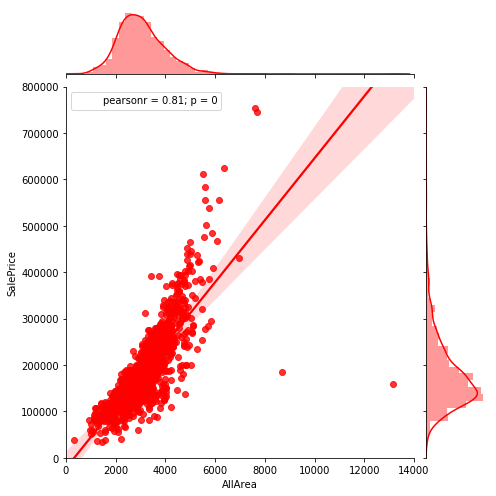

In [42]:
g = sns.jointplot("AllArea", "SalePrice", data=housing_prices, kind="reg",
                  xlim=(0, 14000), ylim=(0, 800000), color="r", size=7)

#### Categorical Variable Neighborhood ####

The categorical variable I believe would be the best candidate for predicting House Sale Price is the neighborhood of the house. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

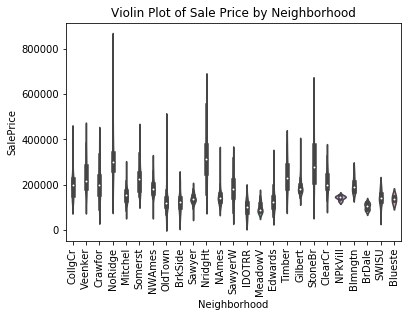

In [14]:
ax = sns.violinplot(x="Neighborhood", y="SalePrice", data=housing_prices)
ax.set_title('Violin Plot of Sale Price by Neighborhood')
plt.xticks(rotation=90)

In [16]:
mean_saleprice_neighborhood= housing_prices.groupby('Neighborhood')['SalePrice'].mean()
mean_saleprice_neighborhood

Neighborhood
Blmngtn    194870.882353
Blueste    137500.000000
BrDale     104493.750000
BrkSide    124834.051724
ClearCr    212565.428571
CollgCr    197965.773333
Crawfor    210624.725490
Edwards    128219.700000
Gilbert    192854.506329
IDOTRR     100123.783784
MeadowV     98576.470588
Mitchel    156270.122449
NAmes      145847.080000
NPkVill    142694.444444
NWAmes     189050.068493
NoRidge    335295.317073
NridgHt    316270.623377
OldTown    128225.300885
SWISU      142591.360000
Sawyer     136793.135135
SawyerW    186555.796610
Somerst    225379.837209
StoneBr    310499.000000
Timber     242247.447368
Veenker    238772.727273
Name: SalePrice, dtype: float64

In [17]:
mean_saleprice_neighborhood.sort_values(ascending = False)

Neighborhood
NoRidge    335295.317073
NridgHt    316270.623377
StoneBr    310499.000000
Timber     242247.447368
Veenker    238772.727273
Somerst    225379.837209
ClearCr    212565.428571
Crawfor    210624.725490
CollgCr    197965.773333
Blmngtn    194870.882353
Gilbert    192854.506329
NWAmes     189050.068493
SawyerW    186555.796610
Mitchel    156270.122449
NAmes      145847.080000
NPkVill    142694.444444
SWISU      142591.360000
Blueste    137500.000000
Sawyer     136793.135135
OldTown    128225.300885
Edwards    128219.700000
BrkSide    124834.051724
BrDale     104493.750000
IDOTRR     100123.783784
MeadowV     98576.470588
Name: SalePrice, dtype: float64

### New Features Creation ###

I created 7 new features based on the housing data.  I created variables based on calculations and I also created variables on a classification. 

#### 1. Age of House ####

I believe age of the house would be a good predictor in the price of the home.  To create this feature, I simply subtracted the Year the house was built from 2018. 

In [23]:
housing_prices['Age'] = 2018 - (housing_prices['YearBuilt'])

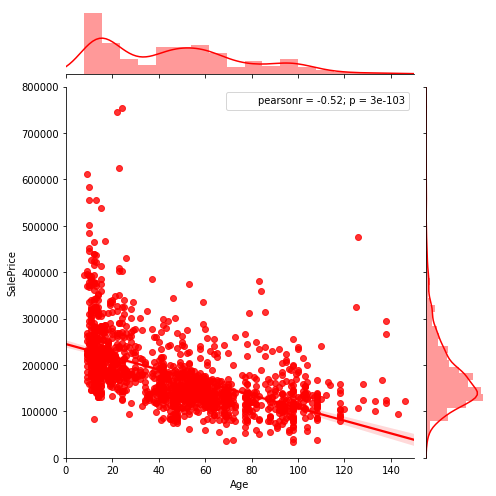

In [24]:
g = sns.jointplot("Age", "SalePrice", data=housing_prices, kind="reg",
                  xlim=(0, 150), ylim=(0, 800000), color="r", size=7)

#### 2. Sale Condition of House ####

There is a noticeable difference in the mean Sale price of Partial Sales Conditions.  So I created a simple binary variable featuring resulting in a score of 1 for Partial Sale and ) for not a Partial Sale.  

In [45]:
salecondition_dict = {'Partial':1, 'Non-Partial':0}

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

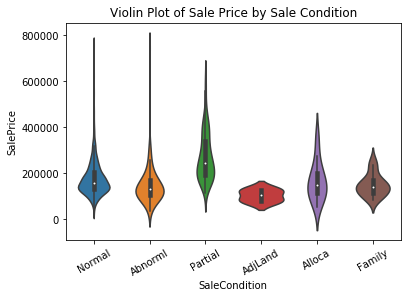

In [43]:
ax = sns.violinplot(x="SaleCondition", y="SalePrice", data=housing_prices)
ax.set_title('Violin Plot of Sale Price by Sale Condition')
plt.xticks(rotation=30)

#### 3. Kitchen Quality ####

There is a noticeable difference in the mean Sale Price of Ex Kitchen Quality and the other types of Kitchen Quality.  I created a simple binary variable with Ex Kitchen Quality resulting a score of 1 and anything other than Ex will receive a score of 0.  

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

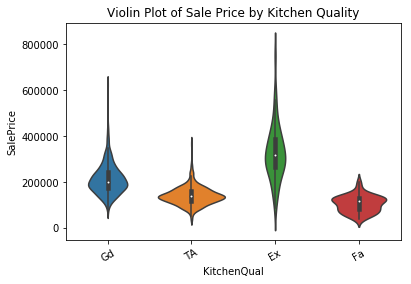

In [44]:
ax = sns.violinplot(x="KitchenQual", y="SalePrice", data=housing_prices)
ax.set_title('Violin Plot of Sale Price by Kitchen Quality')
plt.xticks(rotation=30)

#### 4. Total Number of Bathroooms ####

There is a noticeable positive correlation between the number of bathrooms and the Sale Price of the house.  As the number of bathrooms increases the sale price increases. 

In [18]:
housing_prices['Total_Bath'] = housing_prices['BsmtFullBath'] + housing_prices['BsmtHalfBath'] + housing_prices['FullBath'] +  housing_prices['HalfBath']

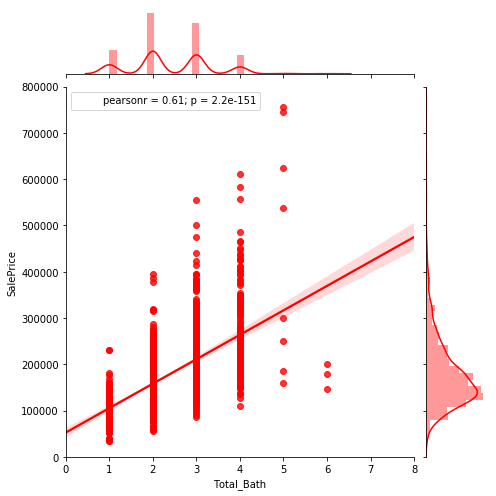

In [20]:
g = sns.jointplot("Total_Bath", "SalePrice", data=housing_prices, kind="reg",
                  xlim=(0, 8), ylim=(0, 800000), color="r", size=7)

#### 5. Age of Garage ####

I believe the age of the garage would have an affect on the Sale Price of the house.  The variable was created by subtracting the current year with the year the garage was built.  It looks like there seems to be a negative correlation between Garage Age and Sale Price.  As the age of Garage increases the Sale Price starts to descend.  

In [21]:
housing_prices['GarageAge'] = 2018 - (housing_prices['GarageYrBlt'])

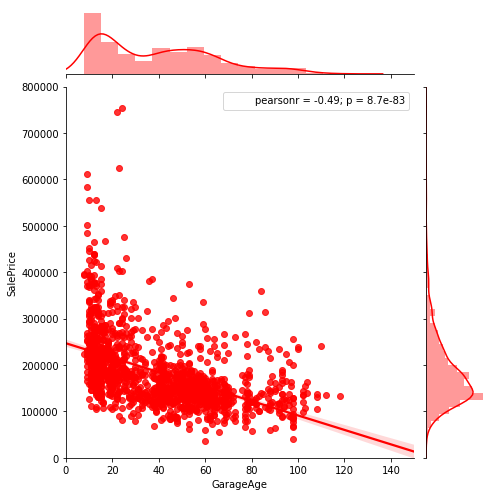

In [25]:
g = sns.jointplot("GarageAge", "SalePrice", data=housing_prices, kind="reg",
                  xlim=(0, 150), ylim=(0, 800000), color="r", size=7)

#### 6. All Area ####

I believe that the total area of the house property would be a good predictor variable of the Sale Price.  I simply created the variable by adding the basement area, the garage area, and all the living area above ground. There seems to be a strong positive correlation between the total area of the house property and the Sale Price of the house. 

In [26]:
housing_prices['AllArea'] = housing_prices['TotalBsmtSF'] + housing_prices['GarageArea'] + housing_prices['GrLivArea']

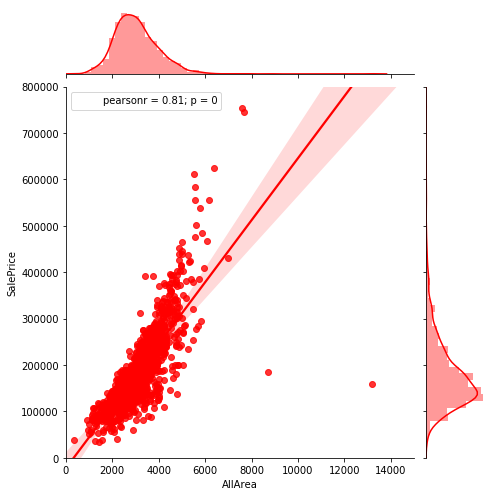

In [29]:
g = sns.jointplot("AllArea", "SalePrice", data=housing_prices, kind="reg",
                  xlim=(0, 15000), ylim=(0, 800000), color="r", size=7)

#### 7. Age of Remodel ####

Have a remodel will definitely affect the price of a house, but the age of the remodel will also be a good predictor variable of Sale Price.  I simply subtracted the Year of Remodel from the current year to get the Age of the Remodel. It looks like there seems to be a negative correlation between Age of Remodel and the Sale Price of the House. 

In [47]:
housing_prices['AgeOfRemod'] = 2018 - housing_prices['YearRemodAdd']

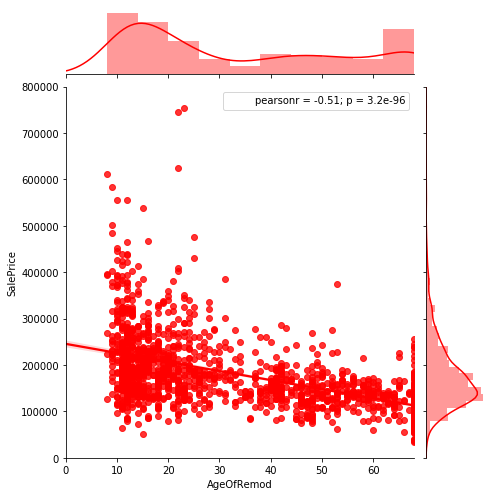

In [48]:
g = sns.jointplot("AgeOfRemod", "SalePrice", data=housing_prices, kind="reg",
                  xlim=(0, housing_prices['AgeOfRemod'].max() ), ylim=(0, 800000), color="r", size=7)